### 1. The Unified Framework

Given inputs $X \in \mathbb R^{n \times T}$, the goal is to learn $k$-dimensional outputs $Y \in \mathbb R^{k\times T}$ such that

$$\max_{Y \in \mathcal D_{Y}} \Phi^* \left(\frac{YX^{\top}}{T}\right) - \frac{1}{2}\Psi^* \left(\frac{YY^{\top}}{T}\right),$$

where $\Phi^*(\cdot)$ and $\Psi^*(\cdot)$ are Legendre transforms of strictly convex functions $\Phi(\cdot)$ and $\Psi(\cdot)$ (so that the optimal dual variables exist)

$$\Phi^*(C_{YX}):= \max_{W \in \mathcal D_{W}} \text{Tr}(WC_{YX}^{\top}) - \Phi(W),$$

$$\Psi^*(C_{YY}):= \max_{M \in \mathcal D_{M}} \text{Tr}(MC_{YY}^{\top}) - \Psi(M).$$

The these functions are non-decreasing when the optimal dual variables $W^*$ and $M^*$ are non-negative. Then, we can interpret the objective as *maximizing the correlation between inputs and outputs, while minimizing the auto-correlation of outputs*.

#### 1.1 Duality Gaps
After introducing Legendre dual variables, the original problem can be written as

$$\max_{Y\in \mathcal D_{Y}}\max_{W\in \mathcal D_{W}} \min_{M\in \mathcal D_{M}}\frac{1}{2T}\text{Tr}\left(2WXY^{\top}- MYY^{\top}\right) - \Phi(W) + \frac{1}{2}\Psi(M). $$

There are other 5 problem after exchanging the order of optimization. It's easy to see that 2 of them are equivalent to the original

$$\max_{Y\in \mathcal D_{Y}}\max_{W\in \mathcal D_{W}} \min_{M \in \mathcal D_{M}} \{\cdots\} = \max_{Y\in \mathcal D_{Y}} \min_{M\in \mathcal D_{M}} \max_{W\in \mathcal D_{W}}  \{\cdots\} = \max_{W\in \mathcal D_{W}} \max_{Y\in \mathcal D_{Y}} \min_{M \in \mathcal D_{M}} \{\cdots\};$$

Other 2 are equivalent and are the upper bound of the original

$$\max_{Y\in \mathcal D_{Y}}\max_{W\in \mathcal D_{W}} \min_{M \in \mathcal D_{M}} \{\cdots\} \leq \color{orange}{\min_{M\in \mathcal D_{M}} \max_{Y\in \mathcal D_{Y}} \max_{W\in \mathcal D_{W}}  \{\cdots\}} = \color{orange}{\min_{M \in \mathcal D_{M}} \max_{W\in \mathcal D_{W}} \max_{Y\in \mathcal D_{Y}}  \{\cdots\}};$$

And the remaining one is a potentialy tighter upper bound of the original

$$\max_{Y\in \mathcal D_{Y}}\max_{W\in \mathcal D_{W}} \min_{M \in \mathcal D_{M}} \{\cdots\} \leq \color{green}{\max_{W\in \mathcal D_{W}} \min_{M\in \mathcal D_{M}} \max_{Y\in \mathcal D_{Y}}  \{\cdots\}} \leq \color{orange}{\min_{M \in \mathcal D_{M}} \max_{W\in \mathcal D_{W}} \max_{Y\in \mathcal D_{Y}}  \{\cdots\}}.$$

We can show that when the optimal $\color{green}{M^*}$ is positive definite, 

$$\max_{Y\in \mathcal D_{Y}}\max_{W\in \mathcal D_{W}} \min_{M \in \mathcal D_{M}} \{\cdots\} = \color{green}{\max_{W\in \mathcal D_{W}} \min_{M\in \mathcal D_{M}} \max_{Y\in \mathcal D_{Y}}  \{\cdots\}}$$

However, the orange bound can be still loose.

#### 1.2 Neural Network Algorithms

We can use projected gradient descent / ascent to solve the green problem above, which leads to a bio-plausible neural network algorithm.

The steady activities of output neurons can be solve by offline projected gradient ascent
$$Y \leftarrow \text{proj}_{\mathcal D_{\bf Y}}\left[{\bf Y} + \eta_Y\frac{\partial \cdots}{\partial Y}\right] =  \text{proj}_{\mathcal D_{\bf Y}}\left[{\bf Y} + \frac{\eta_Y}{T}(WX - MY)\right],$$
or via online updates
$${\bf y}_t \leftarrow \text{proj}_{\mathcal D_{\bf y}}\left[{\bf y} + \eta_y(W{\bf x} - M{\bf y})\right].$$

The synaptic learning rules are
$$W\leftarrow \text{proj}_{\mathcal D_W} \left[W + \eta_W \frac{\partial \cdots}{\partial W}\right] = \text{proj}_{\mathcal D_W} \left[W + \eta_W\left( \frac{YX^{\top} }{T}- \Phi'(W)\right)\right];$$

and 

$$M\leftarrow \text{proj}_{\mathcal D_M} \left[M + \eta_M \frac{\partial \cdots}{\partial M}\right] = \text{proj}_{\mathcal D_M} \left[M + \frac{\eta_M}{2}\left( \frac{XX^{\top} }{T}- \Psi'(M)\right)\right].$$

We can also write the synaptic learning rule as the online updates

$$W\leftarrow \text{proj}_{\mathcal D_W} \left[W + \eta_W\left({\bf y}_t{\bf x}_t^{\top}- \Phi'(W)\right)\right],$$

$$M\leftarrow \text{proj}_{\mathcal D_M} \left[M + \frac{\eta_M}{2}\left({\bf y}_t{\bf y}_t^{\top}- \Psi'(M)\right)\right].$$

When $\eta_W \ll \eta_M$, we can show the global convergence of the neural network dynamics to the solution of the green problem by constructing a Lynapnov function.

#### 1.3 Similarity Matching as Special Choices of $\Phi$ and $\Psi$

Let $W,M,Y$ be unbounded, and $$\Phi(W) = \frac{1}{2}\text{Tr}WW^{\top}, \text{  and  } \Psi(M) = \frac{1}{2}\text{Tr}MM^{\top}.$$

We can verity that their Legendre transforms are 
$$\Phi^*(C) = \Psi^*(C) = \frac{1}{2}\|C\|_F^{2}.$$

The objective function becomes the similarity matching
$$\max_{Y}\left\{ \frac{1}{2}\left\|\frac{YX^{\top}}{T}\right\|_F^{2} - \frac{1}{4}\left\|\frac{YY^{\top}}{T}\right\|_F^{2}\right\} = \max_{Y} \left\{- \frac{1}{4}\left\|\frac{Y^{\top}Y}{T}-\frac{X^{\top}X}{T}\right\|_F^{2}+ \frac{1}{4}\left\|\frac{X^{\top}X}{T}\right\|_F^{2}\right\}$$

And the synaptic learning rules become hebbian plasticity with linear decay.

In the fast lateral interaction regime ($\eta_W \ll \eta_M$), the neural network dynamics will converge to the green upper bound. And we know that $M^*$ is always positive definite if input rank is at least $k$. The green problem equals the original.

The solution of similarity matching can be interpreted as "principal subspace projection", since $Y^*={M^*}^{-1}{W^*}X=U^{\top}X$, and we can show that $U^{\top}U = I_k$, $UU^{\top}XX^{\top}=XX^{\top}UU^{\top}$ $\Rightarrow U = U^{(\leq k)}_{x}Q, Q\in O(k)$, i.e., columns of $U$ are othornomal vectors that span the top-$k$ eigenspace of $XX^{\top}$. Therefore, this problem is also equivalent to PCA (up to rotation)
$$\max_{U\in\mathbb R^{m\times k}:U^{\top}U=I} \frac{1}{T} \text{Tr}U^{\top}XX^{\top}U$$
and the solutions 
$$Y^* = U^{\top}X = Q^{\top}\Sigma_{x}^{(\leq k)}\left(V^{(\leq k)}_x\right)^{\top}.$$

#### 1.4 Nonnegative Independent Component Analysis

Let $Y \in \mathbb R_{\geq 0}^{k \times T}$, $C_{XX} = XX^{\top} / T$ and
$$\Phi(W) = \frac{1}{2}\text{Tr}WC_{XX}W^{\top},\text{  and }\Psi(M)=\frac{1}{2}\text{Tr}MM^{\top}.$$
The optimal Legendre dual variable $W^* = C_{YX}C^{-1}_{XX}$, and $\Phi^*$ can be written as
$$\Phi^*(C_{YX}) = \frac{1}{2} \text{Tr}\left(C_{YX}C_{XX}^{-1}C_{YX}^{\top}\right).$$

The objective function becomes
$$\max_{Y \geq 0}\left\{ \frac{1}{2}\left\|\frac{Y\left(C_{XX}^{-1/2}X\right)^{\top}}{T}\right\|_F^{2} - \frac{1}{4}\left\|\frac{YY^{\top}}{T}\right\|_F^{2}\right\} = \max_{Y \geq 0} \left\{- \frac{1}{4}\left\|\frac{Y^{\top}Y}{T}-\frac{X^{\top}C_{XX}^{-1}X}{T}\right\|_F^{2}+ \frac{1}{4}\left\|\frac{X^{\top}C_{XX}^{-1}X}{T}\right\|_F^{2}\right\}$$

#### 1.5 Canonical Correlation Analysis 
Suppose there are multiple inputs $\{X_i \in \mathbb R^{n_i \times T}\}$, and let $C_{X_iX_i} = X_iX_i^{\top}/T$

We can write our objective as

$$\max_{Y} \sum_{i} \Phi^*_i \left(\frac{YX_i^{\top}}{T}\right) - \frac{1}{2}\Psi^* \left(\frac{YY^{\top}}{T}\right),$$

where $\Phi^{*}_i$ is similar to ICA case
$$\Phi^*_i(C_{YX_i}) = \frac{1}{2}\text{Tr}\left(C_{YX_i}C_{X_iX_i}^{-1}C_{YX_i}^{\top}\right)$$

The objective function is 
$$\max_{Y}\left\{ \frac{1}{2}\sum_{i}\left\|\frac{Y\left(C_{X_iX_i}^{-1/2}X_i\right)^{\top}}{T}\right\|_F^{2} - \frac{1}{4}\left\|\frac{YY^{\top}}{T}\right\|_F^{2}\right\} = \max_{Y} \left\{- \frac{1}{4}\left\|\frac{Y^{\top}Y}{T}-\sum_{i}\frac{X_{i}^{\top}C_{X_{i}X_{i}}^{-1}X_{i}}{T}\right\|_F^{2}+ \sum_{i}\frac{1}{4}\left\|\frac{X_{i}^{\top}C_{X_{i}X_{i}}^{-1}X_{i}}{T}\right\|_F^{2}\right\}.$$

Therefore this problem is equivalent to the principal subspace projection by considering the wighted variable 
$$\Xi = \left[\begin{matrix}C_{X_1X_1}^{-1/2}X_1\\\vdots\\C_{X_iX_i}^{-1/2}X_i\\\vdots\end{matrix}\right],$$
and the goal is to minimize $\min_{Y}\|Y^{\top}Y - \Xi^{\top}\Xi\|$.

As shown above, solving $Y$ is the same as projecting $\Xi$ to its top-$k$ principal subspace. I.e., let $n= \sum_i n_i $
$$\max_{\tilde U\in \mathbb R^{n\times k}:\tilde U^{\top}\tilde U = I} \frac{1}{T}\text{Tr}\tilde U^{\top} \Xi\Xi^{\top} \tilde U = \max_{\tilde U\in \mathbb R^{n\times k}:\tilde U^{\top} \tilde U = I} \frac{1}{T}\text{Tr}\tilde U^{\top} \left[\begin{matrix}I & C_{X1X1}^{-1/2}C_{X_1 X_2}C_{X2X2}^{-1/2} & \cdots & C_{X_i X_i}^{-1/2}C_{X_i X_j}C_{X_j X_j}^{-1/2} & \cdots \\ C_{X2X2}^{-1/2}C_{X_2 X_1}C_{X1X1}^{-1/2} & I & \cdots & C_{X_{i+1} X_{i+1}}^{-1/2}C_{X_{i+1} X_j}C_{X_j X_j}^{-1/2} & \cdots \\ \vdots & \vdots & \ddots & \vdots & \vdots  \end{matrix}\right] \tilde U$$

If we decompose $\tilde U = \left[\begin{matrix}\tilde U_{X_i}\\\vdots\\ \tilde U_{X_i}\\\vdots\end{matrix}\right]$, the above problem can be equivalently written as
$$\max_{\tilde U_{X_i} \in \mathbb R^{n_i\times k}, \forall i} \sum_{i < j} \text{Tr} \tilde U_{X_i}^{\top}C_{X_i X_i}^{-1/2}C_{X_i X_j} C_{X_j X_j}^{-1/2} \tilde U_{X_j}, \text{ s.t. } \sum_{i} \tilde U_{X_i}^{\top} \tilde U_{X_i} = I.$$

Or define $U_{X_i} := C_{X_iX_i}^{-1/2} \tilde U_{X_i}$,

$$\max_{U_{X_i} \in \mathbb R^{n_i\times k}, \forall i} \sum_{i < j} \text{Tr} U_{X_i}^{\top}C_{X_i X_j} U_{X_j}, \text{ s.t. } \sum_{i} U_{X_i}^{\top}C_{X_iX_i}U_{X_i} = I.$$

The solution 
$$Y^* = \sum_i \tilde{M}^{-1} \tilde{W}_i C_{X_i X_i}^{-1/2 }X_i = \sum_i \tilde U_{X_i}^{\top}C_{X_i X_i}^{-1/2} X_i = \sum_i U_{X_i}^{\top} X_i,$$ 
which linearly projects each variable to a subspace which correlate most with all the other variables.

The learned feedforwad weights $$W_j = \tilde{W}_jC_{X_j X_j}^{-1/2} = \frac{1}{T}YX_j^{\top}C_{X_j X_j}^{-1},$$ 
and the learned lateral weights are $$M = \tilde M = \frac{1}{T}YY^{\top} = \sum_{ij}U_{X_i}^{\top}C_{X_i X_j}U_{X_j}.$$

### 2. Numerical Simulation

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


# import general CorrGame(n, k, Phi, Psi, 
#                         constraints = None, eta=None, 
#                         dPhi=None, dPsi=None, device='cpu') 

from corrgame.corrgame import *
from corrgame.trainer import train_offline, train_online
from corrgame.logger import Logger

sns.set_context('talk')

# use gpu acceleration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#### 2.1 Synthetic Data from Lipshutz et al. 2020

In [2]:
X1 = np.load(f'data/synthetic/view1.npy')
X2 = np.load(f'data/synthetic/view2.npy')
X1.shape, X2.shape

((50, 100000), (30, 100000))

In [3]:
# dimensionality of maximal correlated subspace
top_k = 1

In [4]:
C11 = torch.Tensor(X1@X1.T/X1.shape[1]).to(device)
C22 = torch.Tensor(X2@X2.T/X2.shape[1]).to(device)
C12 = torch.Tensor(X1@X2.T/X1.shape[1]).to(device)
sig_1, U11 = torch.eig(C11, eigenvectors=True)
sig_2, U22 = torch.eig(C22, eigenvectors=True)
sig_1 = sig_1[:,0]
sig_2 = sig_2[:,0]
C11_m12 = U11.mm(torch.diag(1./torch.sqrt(sig_1))).mm(U11.t())
C22_m12 = U22.mm(torch.diag(1./torch.sqrt(sig_2))).mm(U22.t())
R12 = C11_m12.mm(C12).mm(C22_m12)

def cca_solution(Rxy):
    # .svd() returns v without transpose
    u, canonical_correlations, v = torch.svd(Rxy)
    tilde_Ux = u[:,:top_k]
    tilde_Uy = v[:,:top_k]
    Ux = C11_m12.mm(tilde_Ux)/np.sqrt(2)
    Uy = C22_m12.mm(tilde_Uy)/np.sqrt(2)
    return sum(canonical_correlations[:top_k])/2, Ux, Uy

max_obj, V1_opt, V2_opt = cca_solution(R12)
P1_opt = V1_opt.mm(V1_opt.t())
P2_opt = V2_opt.mm(V2_opt.t())

#### 2.2 Canonical Correlation Analysis - Original Problem

In [5]:
# substantialize CCA

cca = CorrGame(n=[50,30], k=top_k, 
                Phi=lambda W, X: (W.mm(X.mm(X.t())/X.size(1))*W).sum()/2,
                Psi=lambda M, X: (M*M).sum()/2,
                dPhi = lambda W, X:W.mm(X.mm(X.t())/X.size(1)),
                dPsi = lambda M, X:M,
                constraints = {'Y': lambda x:x,
                               'W': lambda x:x,
                               'M': lambda x:x},
                eta= {'Y': 100.0, 'W': 0.001, 'M': 0.001},
                device=device)

# provide known closed form solutions to W and M
closed_form_dual = {"W": lambda y, w, m, x: cca.corr(y,x).mm(torch.inverse(x.mm(x.t())/x.size(1))),
                    "M": lambda y, w, m, x: cca.corr(y,y)}

In [6]:
# substantialize canonical correlation analysis logger

def obj_error(model, x):
    
    V1 = torch.inverse(model.M).mm(model.W[0]).t()
    V2 = torch.inverse(model.M).mm(model.W[1]).t()
    
    err = torch.abs(max_obj - torch.trace(V1.t().mm(C12).mm(V2))) / max_obj

    return err

def subspace_error(model, x):
    
    V1 = torch.inverse(model.M).mm(model.W[0]).t()
    P1 = V1.mm(V1.t())
    err = ((P1-P1_opt)**2).sum() / (P1_opt**2).sum()  
    
    return err 

def constrain_error(model, x):
    
    V1 = torch.inverse(model.M).mm(model.W[0]).t()
    V2 = torch.inverse(model.M).mm(model.W[1]).t()
    
    err = ((V1.t().mm(C11).mm(V1)+V2.t().mm(C22).mm(V2)-torch.eye(cca.k).to(device))**2).sum()/cca.k
    
    return err 

cca_logger = Logger({
    "objective": lambda model, x: model.objective(x),
    "|Y_t|^2": lambda model, x: (model.Y * model.Y).sum()/model.Y.size(1),
    "|W1|^2": lambda model, x: (model.W[0] * model.W[0]).sum(),
    "|W2|^2": lambda model, x: (model.W[1] * model.W[1]).sum(),
    "|M|^2": lambda model, x: (model.M * model.M).sum(),
    "obj-error": obj_error,
    "subspace-error": subspace_error,
    "constrain-error": constrain_error,
})

In [7]:
%%time
train_offline(cca, [torch.Tensor(X1).to(device), 
                    torch.Tensor(X2).to(device)], 
              cca_logger, init='whiten',
              mode='YWM', closed_form=closed_form_dual, niter=10000)

  0%|          | 0/10000 [00:00<?, ?it/s]

CPU times: user 29.3 s, sys: 4 s, total: 33.3 s
Wall time: 32.9 s


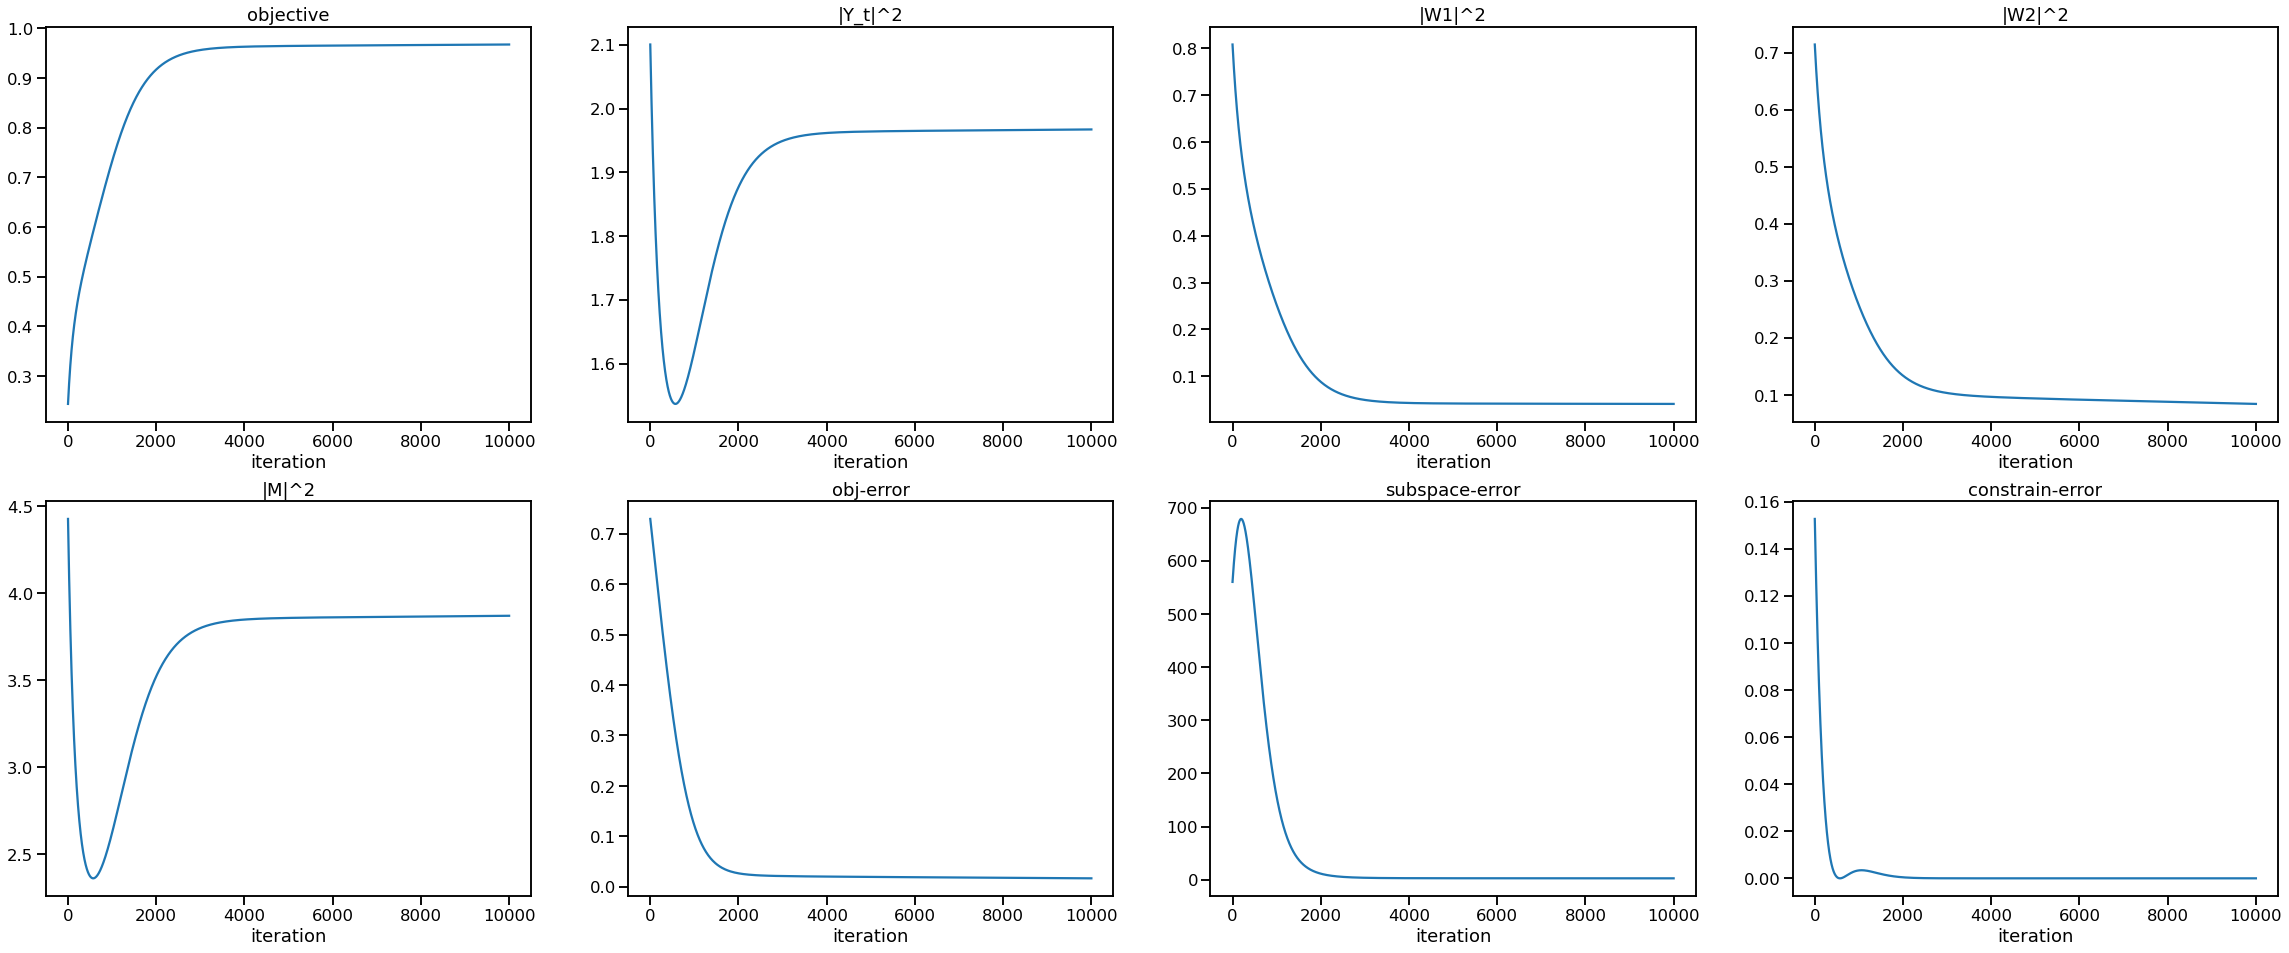

In [8]:
fig, axs = plt.subplots(2, 4, figsize=(40,16))
axs = axs.reshape(-1)
for ax, eval_key in zip(axs, cca_logger.history.keys()):
    ax.plot([s.cpu().numpy() for s in cca_logger.history[eval_key]])
    ax.set_title(eval_key)
    ax.set_xlabel("iteration")
    # ax.set_yscale('log')
plt.show()

#### 2.3 Canonical Correlation Analysis - Equivalence to Similarity Matching

In [9]:
# substantialize Similarity Matching for whitened data

sim_match = CorrGame(n=[50,30], k=top_k, 
                Phi=lambda W, X: (W*W).sum()/2,
                Psi=lambda M, X: (M*M).sum()/2,
                dPhi = lambda W, X:W,
                dPsi = lambda M, X:M,
                constraints = {'Y': lambda x:x,
                               'W': lambda x:x,
                               'M': lambda x:x},
                eta= {'Y': 100.0, 'W': 0.001, 'M': 0.001},
                device=device)

# provide known closed form solutions to W and M
closed_form_dual = {"W": lambda y, w, m, x: sim_match.corr(y,x),
                    "M": lambda y, w, m, x: sim_match.corr(y,y)}

In [10]:
# substantialize similarity matching logger

def sim_obj_error(model, x):
    
    V1 = torch.inverse(model.M).mm(model.W[0]).mm(C11_m12).t()
    V2 = torch.inverse(model.M).mm(model.W[1]).mm(C22_m12).t()
    
    sig, U = torch.eig(V1.t().mm(C11).mm(V1) +\
                       V2.t().mm(C22).mm(V2), eigenvectors=True)  
    sig = sig[:,0]
    
    norm_matrix = U.mm(torch.diag(1./torch.sqrt(sig))).mm(U.t())
    V1_normalized = V1.mm(norm_matrix)
    V2_normalized = V2.mm(norm_matrix)
    
    err = torch.abs(max_obj - torch.trace(V1_normalized.t().mm(C12).mm(V2_normalized))) / max_obj

    return err

def sim_subspace_error(model, x):
    
    V1 = torch.inverse(model.M).mm(model.W[0]).mm(C11_m12).t()
    P1 = V1.mm(V1.t())
    err = ((P1-P1_opt)**2).sum() / (P1_opt**2).sum()
    
    return err 

def sim_constrain_error(model, x):
    
    V1 = torch.inverse(model.M).mm(model.W[0]).mm(C11_m12).t()
    V2 = torch.inverse(model.M).mm(model.W[1]).mm(C22_m12).t()
    
    err = ((V1.t().mm(C11).mm(V1)+V2.t().mm(C22).mm(V2)-torch.eye(cca.k).to(device))**2).sum()/cca.k
    
    return err 

sim_match_logger = Logger({
    "objective": lambda model, x: model.objective(x),
    "|Y_t|^2": lambda model, x: (model.Y * model.Y).sum()/model.Y.size(1),
    "|W1C11^(-1/2)|^2": lambda model, x: (model.W[0].mm(C11_m12) ** 2).sum(),
    "|W2C22^(-1/2)|^2": lambda model, x: (model.W[1].mm(C22_m12) ** 2).sum(),
    "|M|^2": lambda model, x: (model.M * model.M).sum(),
    "obj-error": sim_obj_error,
    "subspace-error": sim_subspace_error,
    "constrain-error": sim_constrain_error,
})

In [11]:
%%time
train_offline(sim_match, [C11_m12.mm(torch.Tensor(X1).to(device)), 
                          C22_m12.mm(torch.Tensor(X2).to(device))], 
              sim_match_logger, init='ortho',
              mode='YWM', closed_form=closed_form_dual, niter=10000)

  0%|          | 0/10000 [00:00<?, ?it/s]

CPU times: user 31.1 s, sys: 16.6 s, total: 47.7 s
Wall time: 34.3 s


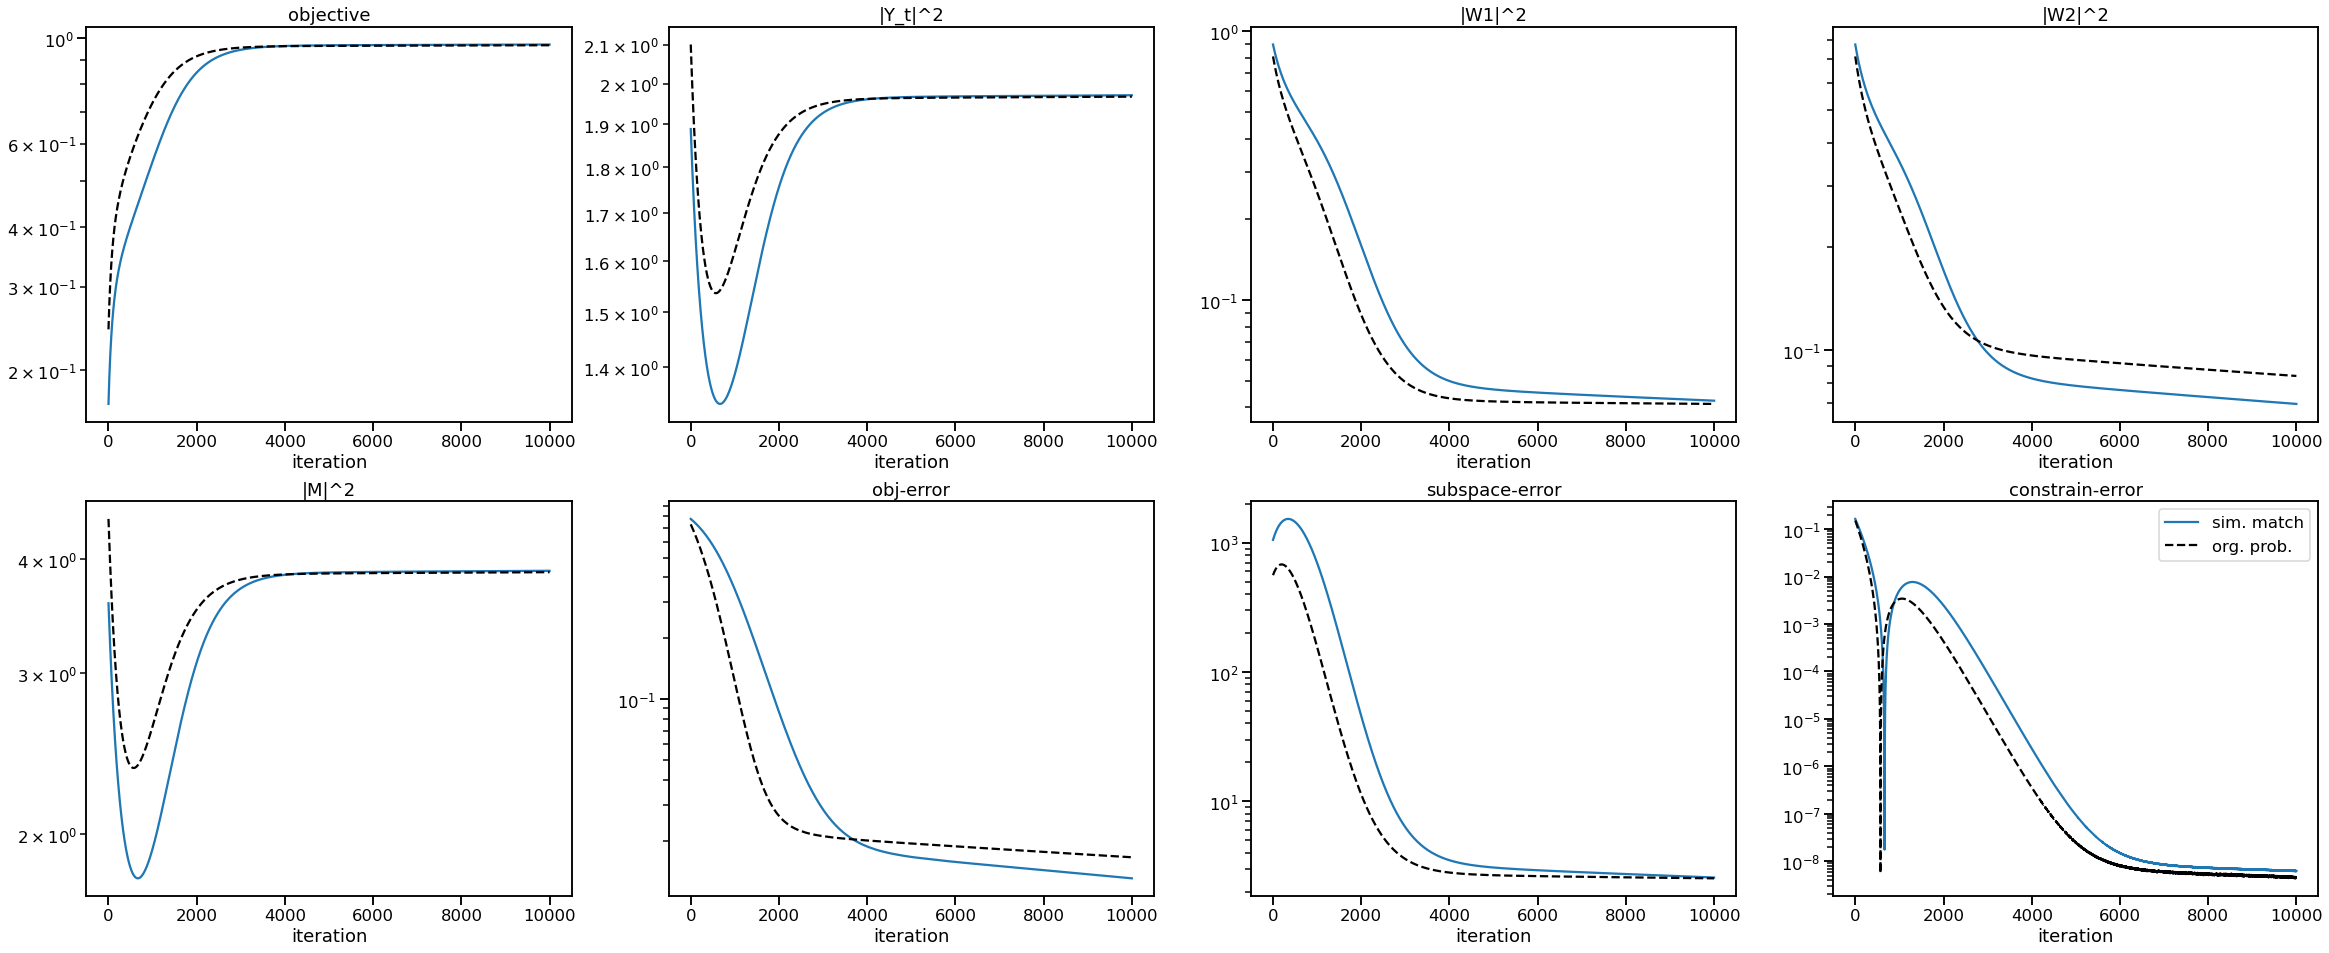

In [12]:
fig, axs = plt.subplots(2, 4, figsize=(40,16))
axs = axs.reshape(-1)

for ax, eval_key in zip(axs, sim_match_logger.history.keys()):
    ax.plot([s.cpu().numpy() for s in sim_match_logger.history[eval_key]], 
            label="sim. match")
    ax.set_title(eval_key)
    ax.set_xlabel("iteration")
    ax.set_yscale('log')

for ax, eval_key in zip(axs, cca_logger.history.keys()):
    ax.plot([s.cpu().numpy() for s in cca_logger.history[eval_key]],
            'k--', label="org. prob.")
    ax.set_title(eval_key)
    ax.set_xlabel("iteration")
    ax.set_yscale('log')

plt.legend()    
plt.show()

#### 2.4 Canonical Correlation Analysis - Neural Network Offline Learning

In [13]:
# substantialize CCA, neural network algorithm
# offline

base_eta = 0.01
tau_list = [0.1, 0.5, 1.0, 1.5]

cca_nn_rls = {tau: CorrGame(n=[50, 30], k=top_k, 
                            Phi=lambda W, X: (W.mm(X.mm(X.transpose(0,1))/X.size(1))*W).sum()/2,
                            Psi=lambda M, X: (M*M).sum()/2,
                            dPhi = lambda W, X:W.mm(X.mm(X.transpose(0,1))/X.size(1)),
                            dPsi = lambda M, X:M,
                            constraints = {'Y': lambda x:x,
                                           'W': lambda x:x,
                                           'M': lambda x:x},
                            eta= {'Y': 0.01, 'W': base_eta, 'M': base_eta/tau},
                            device=device)
                    for tau in tau_list}

# provide known closed form solutions to Y
closed_form_y = {"Y": lambda y, w, m, x: torch.inverse(m).mm(w[0]).mm(x[0]) + torch.inverse(m).mm(w[1]).mm(x[1])}

In [14]:
# substantialize canonical correlation analysis logger

cca_nn_rls_logger = {tau: Logger({
    "objective": lambda model, x: model.objective(x),
    "|Y_t|^2": lambda model, x: (model.Y * model.Y).sum()/model.Y.size(1),
    "|W1|^2": lambda model, x: (model.W[0] * model.W[0]).sum(),
    "|W2|^2": lambda model, x: (model.W[1] * model.W[1]).sum(),
    "|M|^2": lambda model, x: (model.M * model.M).sum(),
    "obj-error": obj_error,
    "subspace-error": subspace_error,
    "constrain-error": constrain_error,
}) for tau in tau_list}

In [15]:
%%time
for tau in tau_list:
    train_offline(cca_nn_rls[tau], [torch.Tensor(X1).to(device),
                                    torch.Tensor(X2).to(device)], 
                  cca_nn_rls_logger[tau], 
                  init='whiten',
                  mode='NN',
                  closed_form=closed_form_y,
                  niter=10000)

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

CPU times: user 1min 50s, sys: 9.65 s, total: 2min
Wall time: 1min 58s


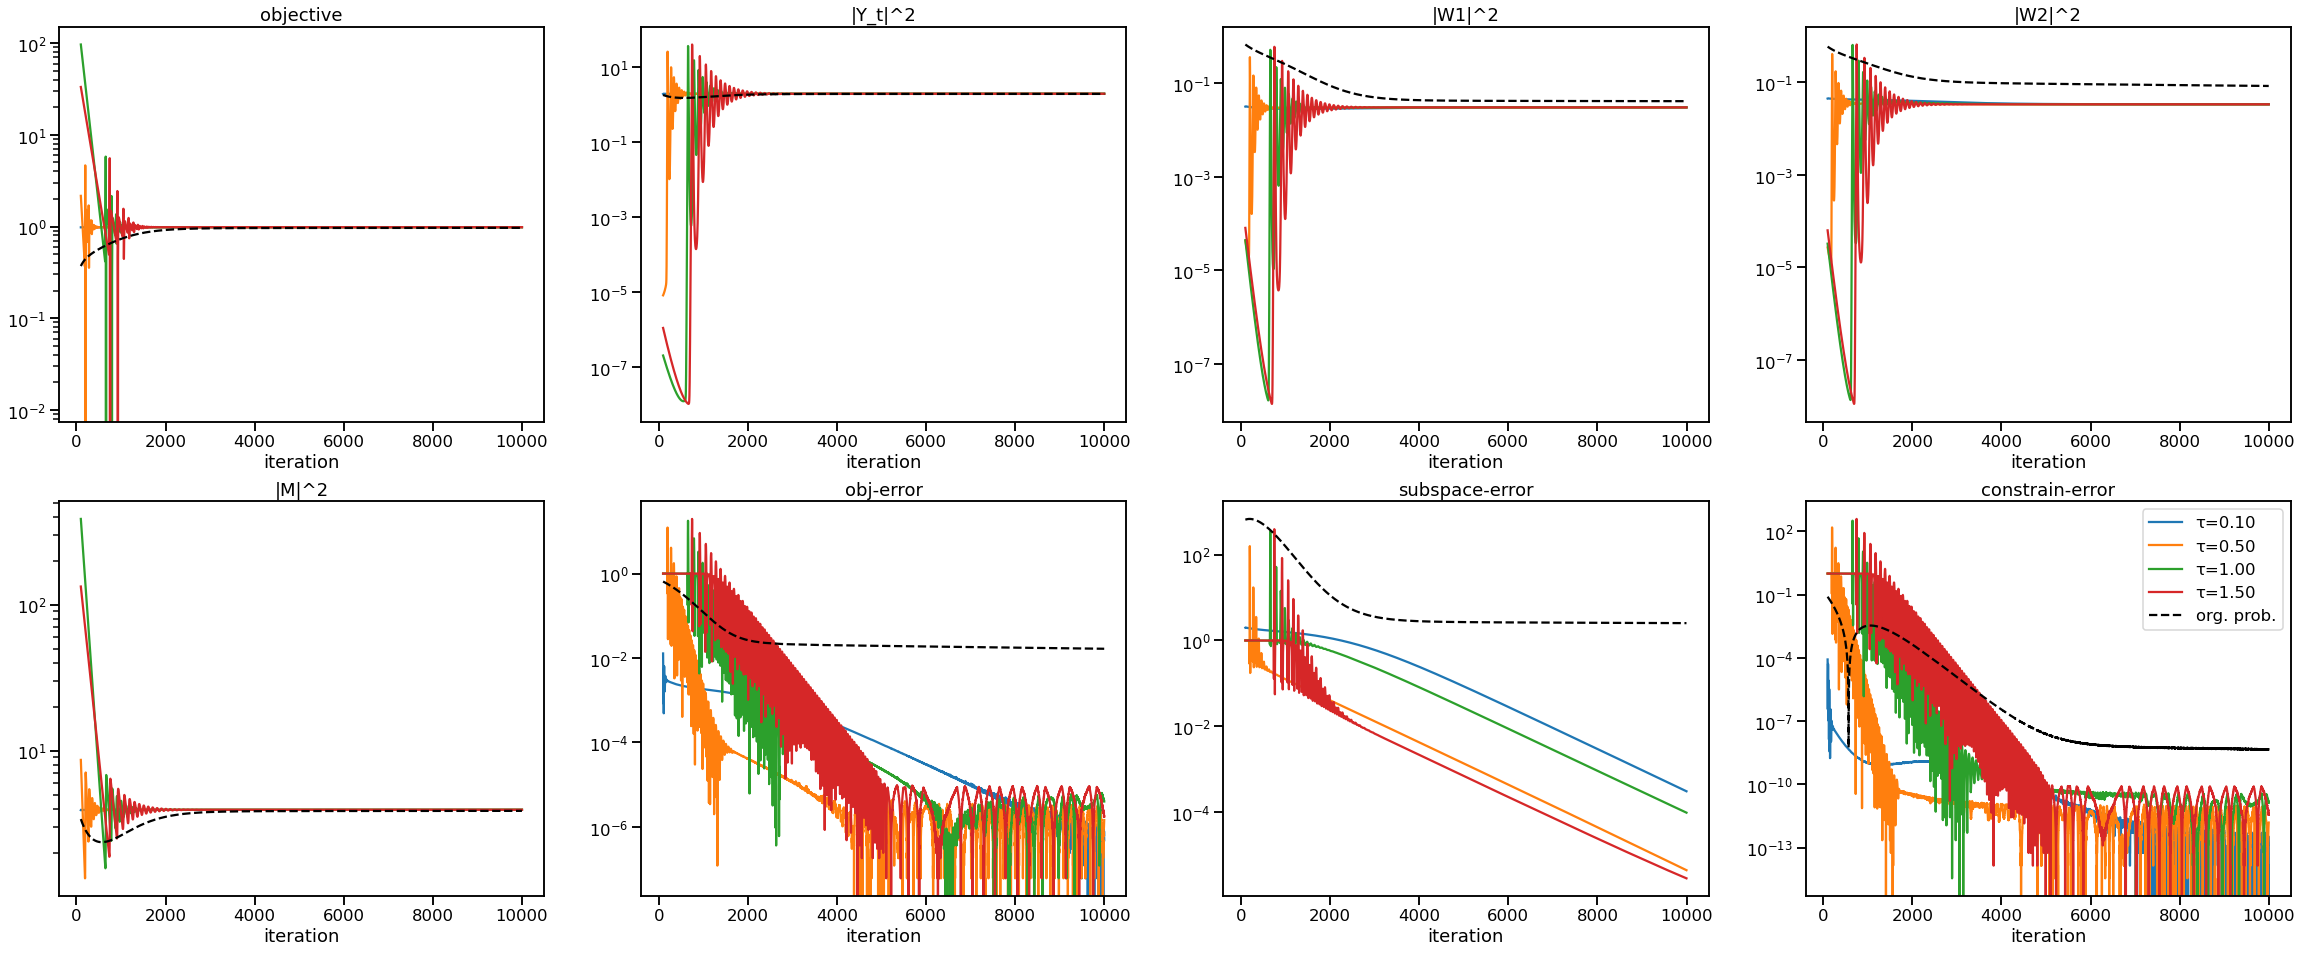

In [16]:
fig, axs = plt.subplots(2, 4, figsize=(40,16))
axs = axs.reshape(-1)

for tau in tau_list:
    for ax, eval_key in zip(axs, cca_nn_rls_logger[tau].history.keys()):
        ax.plot(range(10000)[100:], [s.cpu().numpy() for s in cca_nn_rls_logger[tau].history[eval_key]][100:], 
                label="τ={:.2f}".format(tau))
        ax.set_title(eval_key)
        ax.set_xlabel("iteration")

for ax, eval_key in zip(axs, cca_logger.history.keys()):
    ax.plot(range(10000)[100:], [s.cpu().numpy() for s in cca_logger.history[eval_key]][100:], 
            'k--', label="org. prob.")
    ax.set_title(eval_key)
    ax.set_xlabel("iteration")
    ax.set_yscale('log')
        
plt.legend()
plt.show()

The offline NN solves the problem exactly, without suffering numerical issues as the original problem.

#### 2.5 Canonical Correlation Analysis - Neural Network Online Learning

In [17]:
# substantialize CCA, neural network algorithm
# online

base_eta = 0.005
tau_list = [0.1, 0.5, 1.0, 1.5]

cca_onn_rls = {tau: CorrGame(n=[50, 30], k=top_k, 
                            Phi=lambda W, X: (W.mm(X.mm(X.transpose(0,1))/X.size(1))*W).sum()/2,
                            Psi=lambda M, X: (M*M).sum()/2,
                            dPhi = lambda W, X:W.mm(X.mm(X.transpose(0,1))/X.size(1)),
                            dPsi = lambda M, X:M,
                            constraints = {'Y': lambda x:x,
                                           'W': lambda x:x,
                                           'M': lambda x:x},
                            eta= {'Y': 0.01, 'W': base_eta, 'M': base_eta/tau},
                            device=device)
                    for tau in tau_list}

# provide known closed form solutions to Y
closed_form_y = {"Y": lambda y, w, m, x: torch.inverse(m).mm(w[0]).mm(x[0]) + torch.inverse(m).mm(w[1]).mm(x[1])}

In [18]:
# substantialize canonical correlation analysis logger

cca_onn_rls_logger = {tau: Logger({
    "objective": lambda model, x: model.objective(x),
    "|Y_t|^2": lambda model, x: (model.Y * model.Y).sum()/model.Y.size(1),
    "|W1|^2": lambda model, x: (model.W[0] * model.W[0]).sum(),
    "|W2|^2": lambda model, x: (model.W[1] * model.W[1]).sum(),
    "|M|^2": lambda model, x: (model.M * model.M).sum(),
    "obj-error": obj_error,
    "subspace-error": subspace_error,
    "constrain-error": constrain_error,
}) for tau in tau_list}

In [19]:
%%time
for tau in tau_list:
    train_online(cca_onn_rls[tau], [torch.Tensor(X1).to(device),
                                    torch.Tensor(X2).to(device)], 
                  cca_onn_rls_logger[tau], 
                  init='ortho',
                  mode='NN',
                  closed_form=closed_form_y,
                  batch_size=10, epoch=1)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

CPU times: user 1min 33s, sys: 1.55 s, total: 1min 34s
Wall time: 1min 33s


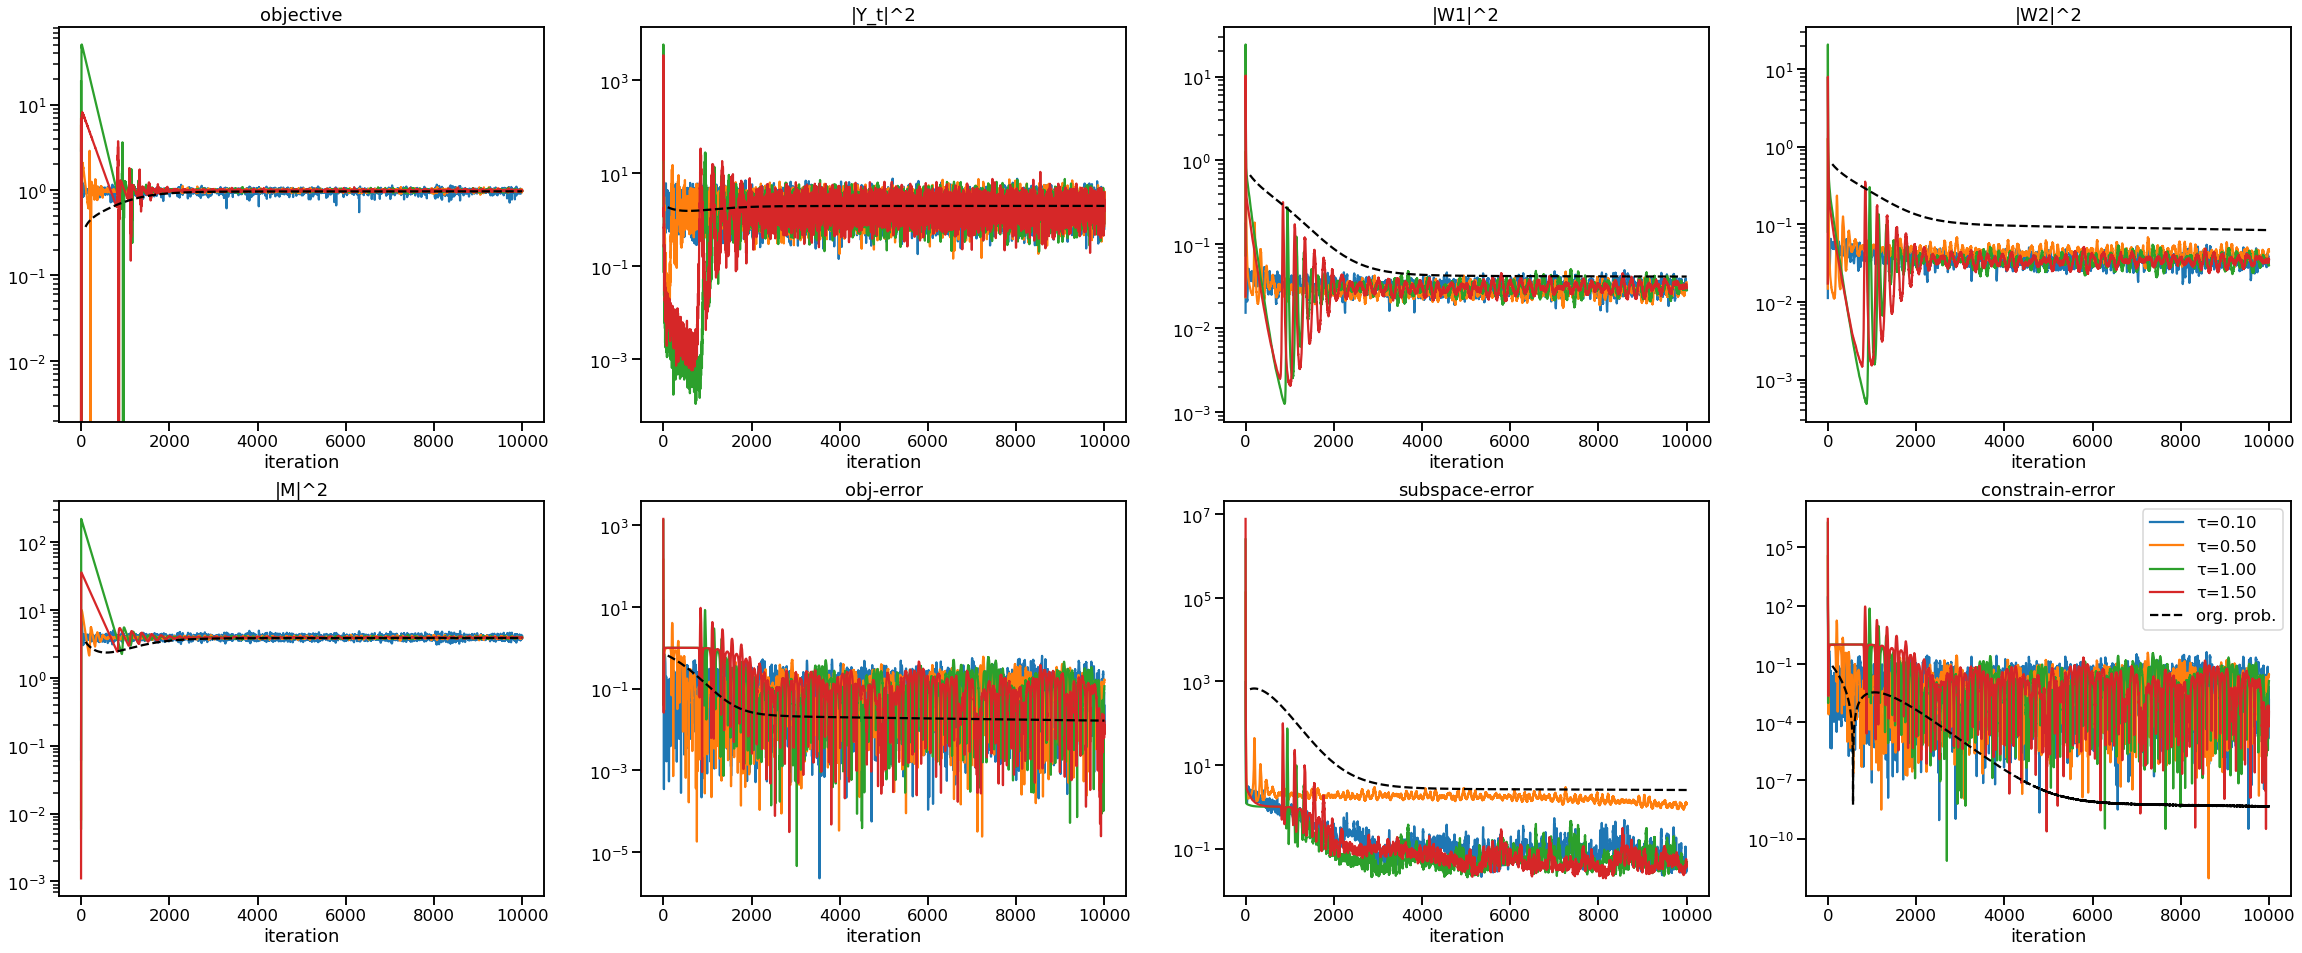

In [20]:
fig, axs = plt.subplots(2, 4, figsize=(40,16))
axs = axs.reshape(-1)

non_overlap_window = 1
for tau in tau_list:
    for ax, eval_key in zip(axs, cca_onn_rls_logger[tau].history.keys()):
        ax.plot(np.array([s.cpu().numpy() for s in cca_onn_rls_logger[tau].history[eval_key]]).reshape(non_overlap_window,-1).mean(0), 
                label="τ={:.2f}".format(tau))
        ax.set_title(eval_key)
        ax.set_xlabel("iteration")

for ax, eval_key in zip(axs, cca_logger.history.keys()):
    ax.plot(range(10000)[100:], [s.cpu().numpy() for s in cca_logger.history[eval_key]][100:], 
            'k--', label="org. prob.")
    ax.set_title(eval_key)
    ax.set_xlabel("iteration")
    ax.set_yscale('log')
        
plt.legend()
plt.show()

#### 2.6 Compare Quality of Results

In [21]:
V1 = torch.inverse(cca.M).mm(cca.W[0]).t()
V2 = torch.inverse(cca.M).mm(cca.W[1]).t()

In [22]:
V1_sim = torch.inverse(sim_match.M).mm(sim_match.W[0]).mm(C11_m12).t()
V2_sim = torch.inverse(sim_match.M).mm(sim_match.W[1]).mm(C22_m12).t()

In [23]:
V1_nn = torch.inverse(cca_nn_rls[0.1].M).mm(cca_nn_rls[0.1].W[0]).t()
V2_nn = torch.inverse(cca_nn_rls[0.1].M).mm(cca_nn_rls[0.1].W[1]).t()

In [24]:
V1_onn = torch.inverse(cca_onn_rls[0.1].M).mm(cca_onn_rls[0.1].W[0]).t()
V2_onn = torch.inverse(cca_onn_rls[0.1].M).mm(cca_onn_rls[0.1].W[1]).t()

In [25]:
F.cosine_similarity(V1_opt, V1, dim=0), F.cosine_similarity(V1_opt, V1_sim, dim=0), F.cosine_similarity(V1_opt, V1_nn, dim=0), F.cosine_similarity(V1_opt, V1_onn, dim=0)

(tensor([0.3664], device='cuda:0'),
 tensor([0.3888], device='cuda:0'),
 tensor([0.9999], device='cuda:0'),
 tensor([-0.9907], device='cuda:0'))

In [26]:
F.cosine_similarity(V2_opt, V2, dim=0), F.cosine_similarity(V2_opt, V2_sim, dim=0), F.cosine_similarity(V2_opt, V2_nn, dim=0), F.cosine_similarity(V2_opt, V2_onn, dim=0)

(tensor([0.2243], device='cuda:0'),
 tensor([0.3145], device='cuda:0'),
 tensor([0.9999], device='cuda:0'),
 tensor([-0.9925], device='cuda:0'))

In [27]:
V1_opt.t().mm(C12).mm(V2_opt), V1.t().mm(C12).mm(V2), V1_sim.t().mm(C12).mm(V2_sim), V1_nn.t().mm(C12).mm(V2_nn), V1_onn.t().mm(C12).mm(V2_onn)

(tensor([[0.4919]], device='cuda:0'),
 tensor([[0.4838]], device='cuda:0'),
 tensor([[0.4856]], device='cuda:0'),
 tensor([[0.4919]], device='cuda:0'),
 tensor([[0.4731]], device='cuda:0'))